In [30]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier # meta estimador para hacer bagging
from sklearn.ensemble import GradientBoostingClassifier # meta estimador para hacer el boosting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('../data/heart.csv')

In [14]:
X = df.drop('target', axis = 1)
y = df['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

Lo que se hará en este notebook es una compración, del resultado del clasificador por si solo y con un método de ensamble

# Bagging

In [16]:
kn = KNeighborsClassifier().fit(X_train,y_train)
kn_predict = kn.predict(X_test)
kn_accuracy = accuracy_score(kn_predict,y_test)
print('Accuracy clasificador sin métodos de ensamble :',kn_accuracy)

Accuracy clasificador sin métodos de ensamble : 0.7463414634146341


In [29]:
bgg = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=49).fit(X_train,y_train)
bgg_predict = bgg.predict(X_test)
bgg_accuracy = accuracy_score(bgg_predict,y_test)
print('Accuracy clasificado con métodos de ensamble (Bagging)',bgg_accuracy)

Accuracy clasificado con métodos de ensamble (Bagging) 0.824390243902439


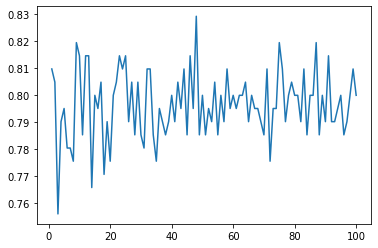

In [18]:
lst_a = []
for i in range(1,101):
    bgg = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=i).fit(X_train,y_train) # n_estimators cantidad de estimadores en el modelo
    bgg_predict = bgg.predict(X_test)
    bgg_accuracy = accuracy_score(bgg_predict,y_test)
    lst_a.append(bgg_accuracy)

plt.plot(range(1,101),lst_a)

# Boosting 

El GradientBoostingClassifier utiliza arboles de decisión de fondo, lo que hace es contruir arboles con poca profundidad, y va a entrenarlos uno detrás de otro para lograr un resultado optimo

In [32]:
boos = GradientBoostingClassifier(n_estimators=50).fit(X_train,y_train) # n_estimators cantidad de arboles en el modelo
boos_predict = boos.predict(X_test)
boos_accuracy = accuracy_score(boos_predict,y_test)
print('Accuracy clasificado con métodos de ensamble (Bossting)',boos_accuracy)

Accuracy clasificado con métodos de ensamble (Bossting) 0.9560975609756097
